In [ ]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)
import seaborn as sns 

In [ ]:
# Reading Data
data=pd.read_csv('Forest Density with index.csv')

In [ ]:
print(data.shape)
data.head()

(60, 8)


,Forest_Den,NDVI,GARI,MNDWI,NDII,OSAVI,NDBI,LAI
0,1,0.130892,0.292274,-0.087524,0.144985,0.196336,-0.144985,0.402387
1,1,0.121020,0.279631,-0.078906,0.146495,0.181528,-0.146495,0.369988
2,1,0.127769,0.286926,-0.084686,0.155019,0.191651,-0.155019,0.393820
3,1,0.121140,0.277332,-0.078848,0.137975,0.181708,-0.137975,0.373453
4,1,0.093982,0.251646,-0.053798,0.119517,0.140972,-0.119517,0.274343


As you can see there are 60 values in the training set. We will find a linear relationship between forest_density and NDVI. So, now we will get these variables.

In [ ]:
# Collecting X and Y
X = data['Forest_Den'].values
Y = data['NDII'].values

To find the values β1
​	  and β0, we will need mean of X and Y. We will find these and the coeffients.

In [ ]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [ ]:
# Total number of values
m = len(X)

In [ ]:
# Using the formula to calculate b1 and b2
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

In [ ]:
# Print coefficients
print(b1, b0)

0.06126062500000001 0.06484604999999993


There we have our coefficients.
NDVI = 0.037879576666666664 + 0.0694754025 * Forest_den.
That is our linear model.
Now we will see this graphically.

In [ ]:
# Plotting Values and Regression Line
max_x = np.max(X) + 8
min_x = np.min(X) -1
# Calculating line values x and y
x = np.linspace(min_x, max_x, 10)
y = b0 + b1 * x

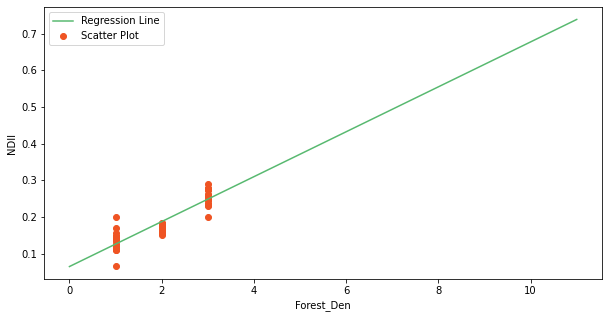

In [ ]:
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
plt.xlabel('Forest_Den')
plt.ylabel('NDII')
plt.legend()
plt.show()

This model is not so bad. But we need to find how good is our model. There are many methods to evaluate models. We will use Root Mean Squared Error and Coefficient of Determination(R^2 Score).
Root Mean Squared Error is the square root of sum of all errors divided by number of values, or Mathematically

In [ ]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print(rmse)

0.023619500874268767


R^2Score usually range from 0 to 1. It will also become negative if the model is completely wrong. Now we will find R^2 Score.

In [ ]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.8176735096227454


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
y_true = []